IMPORTING PACKAGES (Package Offered (LPA))

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
import numpy as np

IMPORTING THE DATASET

In [18]:
data=pd.read_csv('CPD.csv')
data.head()

,Serial No,Age,Gender,Stream,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA)
0,1,22,Female,Electronics And Communication,8,9,6,1,0,0,0
1,2,21,Female,Computer Science,7,8,9,0,1,1,7
2,3,22,Male,Information Technology,6,6,8,2,1,1,4
3,4,21,Female,Information Technology,8,9,9,2,0,1,12
4,5,22,Male,Mechanical,8,7,7,1,0,1,7


GENDER COLUMN BINARY CONVERSION

In [19]:
data['Gender'].replace(list(data['Gender'].unique()), range(len(data['Gender'].unique())), inplace=True)
data.head()

,Serial No,Age,Gender,Stream,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA)
0,1,22,0,Electronics And Communication,8,9,6,1,0,0,0
1,2,21,0,Computer Science,7,8,9,0,1,1,7
2,3,22,1,Information Technology,6,6,8,2,1,1,4
3,4,21,0,Information Technology,8,9,9,2,0,1,12
4,5,22,1,Mechanical,8,7,7,1,0,1,7


STREAM COLUMN DUMMY CODING

In [20]:
stream=pd.get_dummies(data['Stream'],drop_first=True)
data=pd.concat([data,stream],axis=1)
data.drop(['Stream'],axis=1,inplace=True)
data.head()

,Serial No,Age,Gender,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA),Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,22,0,8,9,6,1,0,0,0,0,0,1,0,0
1,2,21,0,7,8,9,0,1,1,7,1,0,0,0,0
2,3,22,1,6,6,8,2,1,1,4,0,0,0,1,0
3,4,21,0,8,9,9,2,0,1,12,0,0,0,1,0
4,5,22,1,8,7,7,1,0,1,7,0,0,0,0,1


In [21]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(15, 15))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\raami\AppData\Local\Temp/ipykernel_24632/3036344791.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.000,-0.196,0.204,0.019,-0.156,0.084,-0.640,0.181,-0.426,0.498,-0.164,0.425,-0.152,0.034,-0.533
1,-0.196,1.000,-0.108,0.197,0.013,0.080,0.165,0.320,0.389,0.003,0.232,-0.083,-0.088,0.204,0.279
2,0.204,-0.108,1.000,0.147,0.382,0.485,-0.165,0.047,0.412,0.210,0.487,-0.163,0.104,-0.155,-0.078
3,0.019,0.197,0.147,1.000,-0.082,0.435,-0.311,-0.082,0.243,0.034,0.282,-0.636,0.436,-0.063,-0.312
4,-0.156,0.013,0.382,-0.082,1.000,0.153,0.296,0.330,-0.023,-0.113,-0.060,-0.171,-0.031,0.286,0.087
5,0.084,0.080,0.485,0.435,0.153,1.000,-0.042,0.431,0.178,0.206,0.299,-0.299,0.211,-0.056,0.018
6,-0.640,0.165,-0.165,-0.311,0.296,-0.042,1.000,0.147,0.122,-0.408,0.176,0.096,0.350,0.160,0.409
7,0.181,0.320,0.047,-0.082,0.330,0.431,0.147,1.000,-0.144,0.085,-0.166,0.258,-0.167,-0.005,-0.154
8,-0.426,0.389,0.412,0.243,-0.023,0.178,0.122,-0.144,1.000,-0.035,0.671,-0.446,0.141,-0.036,0.133
9,0.498,0.003,0.210,0.034,-0.113,0.206,-0.408,0.085,-0.035,1.000,-0.167,0.222,-0.030,-0.027,-0.098


MISSING VALUE DETECTION

In [22]:
print(data.isnull().sum())

Serial No                        0
Age                              0
Gender                           0
CGPA                             0
Coding Skills                    0
Communication Skills             0
Internships                      0
HistoryOfBacklogs                0
PlacedOrNot                      0
Package Offered (LPA)            0
Computer Science                 0
Electrical                       0
Electronics And Communication    0
Information Technology           0
Mechanical                       0
dtype: int64


DATA NORMALIZATION

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['Age', 'CGPA','Coding Skills','Communication Skills','Internships']
data[num_vars] = scaler.fit_transform(data[num_vars])
data.head()

,Serial No,Age,Gender,CGPA,Coding Skills,Communication Skills,Internships,HistoryOfBacklogs,PlacedOrNot,Package Offered (LPA),Computer Science,Electrical,Electronics And Communication,Information Technology,Mechanical
0,1,0.2,0,0.75,1.0,0.4,0.5,0,0,0,0,0,1,0,0
1,2,0.1,0,0.50,0.8,1.0,0.0,1,1,7,1,0,0,0,0
2,3,0.2,1,0.25,0.4,0.8,1.0,1,1,4,0,0,0,1,0
3,4,0.1,0,0.75,1.0,1.0,1.0,0,1,12,0,0,0,1,0
4,5,0.2,1,0.75,0.6,0.6,0.5,0,1,7,0,0,0,0,1


SELECTING THE INSTANCES WHERE PLACEMENT OCCURS


In [24]:
data = data[data['PlacedOrNot']==1]

DATA SPLIT

In [25]:
x=data.drop(['PlacedOrNot','Package Offered (LPA)','Serial No'],axis=1)
y=data['Package Offered (LPA)']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=100)

LINEAR REGRESSION MODEL SCORE AND ERROR CALCULATION

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))

Training Data Score :  0.7009651596347319
Testing Data Score :  0.6288284533255373


In [27]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error : ', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error : ', mse) 
mae= mean_absolute_error(ytest, ypred)
print('Mean absolute error : ', mae)

Root mean square error :  1.9044760208767784
Mean square error :  3.627028914094647
Mean absolute error :  1.591545194426184


DECISION TREE REGRESSOR MODEL SCORE AND ERROR CALCULATION


In [28]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))
print(f'Depth = {model.get_depth()}')

Training Data Score :  0.8939083938101818
Testing Data Score :  0.8470830356405152
Depth = 5


In [29]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error : ', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error : ', mse) 
mae= mean_absolute_error(ytest, ypred)
print('Mean absolute error : ', mae)

Root mean square error :  1.222407496439863
Mean square error :  1.4942800873523736
Mean absolute error :  0.8525315742060287


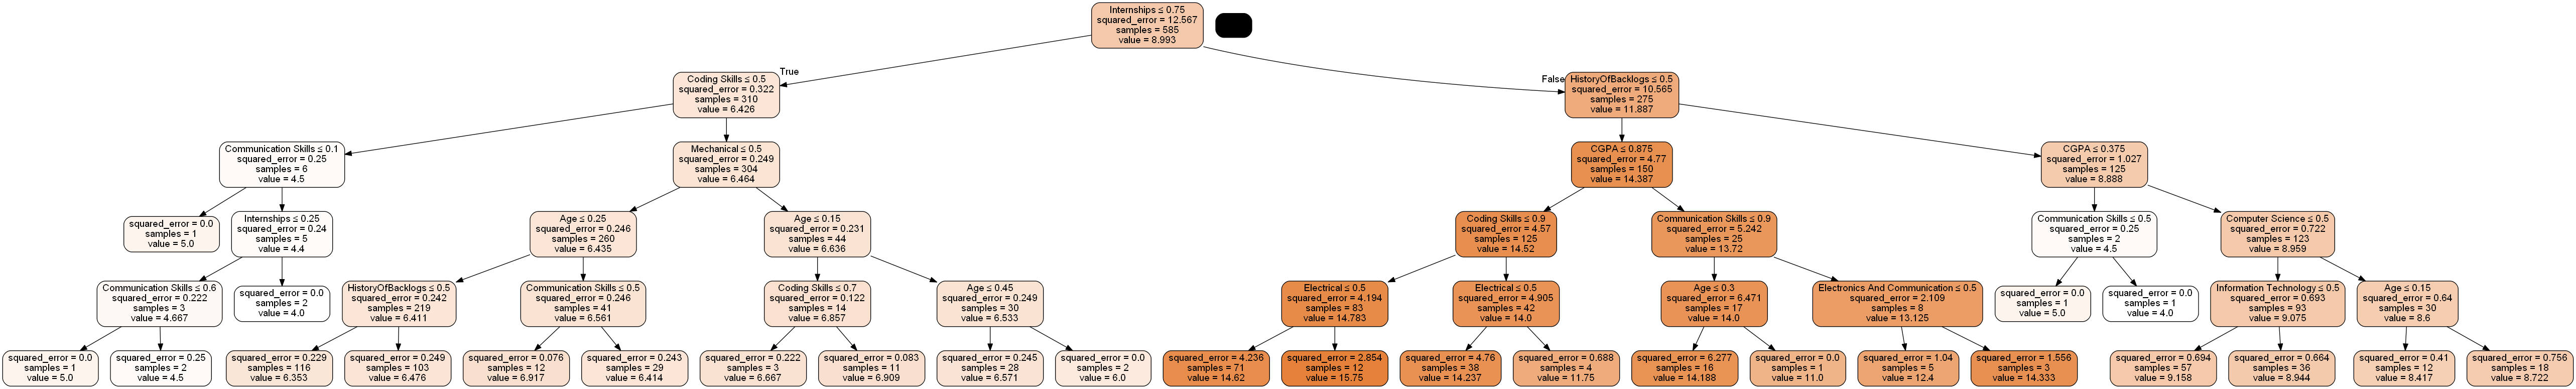

In [30]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = list(x.columns),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('CPP-PkDt.png')
Image(graph.create_png())

RANDOM FOREST REGRESSOR MODEL SCORE AND ERROR CALCULATION


In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print("Training Data Score : ",model.score(xtrain,ytrain))
print("Testing Data Score : ",model.score(xtest,ytest))
print(f'Estimators = {model.n_estimators}')

Training Data Score :  0.9621452976173649
Testing Data Score :  0.8601288020390374
Estimators = 100


In [36]:
rmse = math.sqrt(mean_squared_error(ytest, ypred)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(ytest, ypred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(ytest, ypred)
print('Mean absolute error', mae)

Root mean square error 1.1691017694264338
Mean square error 1.3667989472760187
Mean absolute error 0.8184206754130221


In [37]:

df=pd.DataFrame({'Actual':ytest, 'Predicted':ypred})
df

,Actual,Predicted
284,7,6.317500
719,7,6.165000
28,7,6.340000
796,7,6.352333
1186,7,6.200000
...,...,...
972,15,14.706667
559,8,9.598333
69,7,6.858000
1212,11,12.906667


STORING THE MODEL

In [74]:
import pickle
pickle.dump(model,open('Package.pkl','wb'))